# SPAM FILTERATION PROJECT

In [1]:
#In this spam filtering project,we have filter out the mails into 'spam'and 'Ham' mail.
# This is very useful to categorise the information to prevent from any kinds of fake or fraud messages which can harm us online

In [2]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Data collection & preprocessing 
df=pd.read_csv("mail_data - mail_data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.head()      #first 5 records will display

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()     # last 5 records will display

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


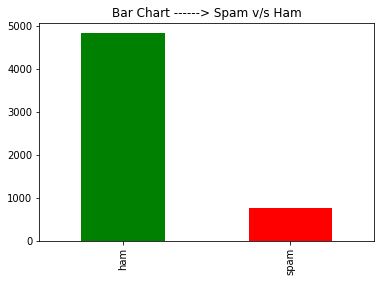

In [6]:
# Visualize Distribution of Messages using Bar Chart
count_class=pd.value_counts(df['Category'],sort=True)
count_class.plot(kind='bar',color=['Green','Red'])
plt.title('Bar Chart ------> Spam v/s Ham')
plt.show()

In [7]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
df.shape

(5572, 2)

In [9]:
df.describe()   #describe numerical factors

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
# Import label encoder for feature scaling
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Category'. 
df['Category']= label_encoder.fit_transform(df['Category']) 
df.head()
# here 1 denotes spam mail and O denotes Ham mail

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Now to divide the data into X and Y( dependent and independent variable)
X=df["Message"]
Y=df["Category"]

In [13]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [14]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32


In [15]:
# SPLITTING OF DATA INTO TRAINING AND TESTING
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457,)
(4457,)
(1115,)
(1115,)


In [17]:
# NOW TO APPLY FEATURE EXTRACTION
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [18]:
print(x_train)

3890                    Unlimited texts. Limited minutes.
5553                          Hahaha..use your brain dear
4366    Ujhhhhhhh computer shipped out with address to...
3968    YOU HAVE WON! As a valued Vodafone customer ou...
3771    Love it! The girls at the office may wonder wh...
                              ...                        
3335    That's fine, have him give me a call if he kno...
1099    NO GIFTS!! You trying to get me to throw mysel...
2514    U have won a nokia 6230 plus a free digital ca...
3606                      Jordan got voted out last nite!
2575    Your next amazing xxx PICSFREE1 video will be ...
Name: Message, Length: 4457, dtype: object


In [19]:
print(x_train_features)

  (0, 4334)	0.42941702167641554
  (0, 3958)	0.6161071828926097
  (0, 6586)	0.44333254982109394
  (0, 6927)	0.48935591439341625
  (1, 2121)	0.3573617143022146
  (1, 1428)	0.5869421390016223
  (1, 6971)	0.42812434651556874
  (1, 3168)	0.5869421390016223
  (2, 5115)	0.3408491178137899
  (2, 7353)	0.31988118061968496
  (2, 3852)	0.3408491178137899
  (2, 4884)	0.35749230587184955
  (2, 5695)	0.35749230587184955
  (2, 806)	0.26730249393705324
  (2, 5894)	0.35749230587184955
  (2, 1876)	0.28751725124107325
  (2, 6878)	0.35749230587184955
  (3, 197)	0.36522237107066735
  (3, 3723)	0.16297045459835785
  (3, 2435)	0.26698378141852
  (3, 1825)	0.26858331513730566
  (3, 5231)	0.2266831802864503
  (3, 300)	0.2915969875465198
  (3, 7248)	0.23571908490908416
  (3, 5005)	0.3169028431039865
  :	:
  (4454, 2244)	0.2526916142542512
  (4454, 666)	0.28653660324238944
  (4454, 1575)	0.20946314330145205
  (4454, 1094)	0.24862733340971144
  (4454, 5068)	0.22284357632450164
  (4454, 311)	0.19547195974237946
  

# LOGISTIC REGRESSION

In [20]:
#LOGISTIC REGRESSION
lr=LogisticRegression()
lr.fit(x_train_features,y_train)

LogisticRegression()

In [21]:
#checking accuracy of test data
pred_test=lr.predict(x_test_features)
print(pred_test)

accuracy_of_test_data=accuracy_score(pred_test,y_test)
accuracy_of_test_data

[0 0 0 ... 0 0 1]


0.9524663677130045

In [22]:
#checking accuracy of train data
pred_train=lr.predict(x_train_features)
print(pred_train)

accuracy_of_train_data=accuracy_score(pred_train,y_train)
accuracy_of_train_data

[0 0 0 ... 1 0 0]


0.9683643706529056

In [23]:
# ........................................LET'S DO A PREDICTION.....................................................

In [24]:
input=["win a free jackpot"]
input_feature=feature_extraction.transform(input)

prediction=lr.predict(input_feature)
prediction
if (prediction[0]==1):
    print("SPAM")
else:
    print("HAM")

SPAM


# DECISION TREE

In [25]:
# let's apply decision tree
#fitting decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",random_state=0)
dt.fit(x_train_features,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:

#checking accuracy of test data
pred_test=lr.predict(x_test_features)
print(pred_test)

accuracy_of_test_data=accuracy_score(pred_test,y_test)
accuracy_of_test_data

#checking accuracy of train data
pred_train=lr.predict(x_train_features)
print(pred_train)

accuracy_of_train_data=accuracy_score(pred_train,y_train)
accuracy_of_train_data



[0 0 0 ... 0 0 1]
[0 0 0 ... 1 0 0]


0.9683643706529056

In [27]:
#................................#let's check...............................................................
input=["win a free jackpot"]
input_feature=feature_extraction.transform(input)

prediction=lr.predict(input_feature)
prediction
if (prediction[0]==1):
    print("SPAM")
else:
    print("HAM")

SPAM


# NAIVE BAYES

In [28]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()  
NB_classifier.fit(x_train_features, y_train)

MultinomialNB()

In [29]:
#checking accuracy of test data
pred_test=lr.predict(x_test_features)
print(pred_test)

accuracy_of_test_data=accuracy_score(pred_test,y_test)
accuracy_of_test_data

#checking accuracy of train data
pred_train=lr.predict(x_train_features)
print(pred_train)

accuracy_of_train_data=accuracy_score(pred_train,y_train)
accuracy_of_train_data

[0 0 0 ... 0 0 1]
[0 0 0 ... 1 0 0]


0.9683643706529056

In [30]:
#................................#let's check...............................................................
input=["You have got a mail from abc"]
input_feature=feature_extraction.transform(input)

prediction=lr.predict(input_feature)
prediction
if (prediction[0]==1):
    print("SPAM")
else:
    print("HAM")

HAM


# Random Forest

In [31]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
RF_classifier= RandomForestClassifier(n_estimators= 15, criterion="entropy")  
RF_classifier.fit(x_train_features, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [32]:
#checking accuracy of test data
pred_test=lr.predict(x_test_features)
print(pred_test)

accuracy_of_test_data=accuracy_score(pred_test,y_test)
accuracy_of_test_data

#checking accuracy of train data
pred_train=lr.predict(x_train_features)
print(pred_train)

accuracy_of_train_data=accuracy_score(pred_train,y_train)
accuracy_of_train_data

[0 0 0 ... 0 0 1]
[0 0 0 ... 1 0 0]


0.9683643706529056

In [33]:
#................................#let's check...............................................................
input=["win a free jackpot"]
input_feature=feature_extraction.transform(input)

prediction=lr.predict(input_feature)
prediction
if (prediction[0]==1):
    print("SPAM")
else:
    print("HAM")

SPAM
